## Laptop Sales Analysis

In [1]:
# Packages required
import pandas as pd
import numpy as np

In [2]:
# Files to import
data = pd.read_csv("C:\\Users\\Arpita\\Desktop\\AnalytixLabs\\Tableau\\Tableau Case studies\\Laptops.csv")
pos = pd.read_csv("C:\\Users\\Arpita\\Desktop\\AnalytixLabs\\Tableau\\Tableau Case studies\\POS.csv")
store= pd.read_csv("C:\\Users\\Arpita\\Desktop\\AnalytixLabs\\Tableau\\Tableau Case studies\\Store_Locations.csv")

In [55]:
# Statiscal summary of numeric variables
data.describe()

,Configuration,Screen Size (Inches),Battery Life (Hours),RAM (GB),Processor Speeds (GHz),HD Size (GB)
count,864.000000,864.000000,864.00000,864.000000,864.000000,864.000000
mean,432.500000,16.000000,5.00000,2.333333,1.966667,135.000000
std,249.559612,1.000579,0.81697,1.247942,0.368392,99.430592
min,1.000000,15.000000,4.00000,1.000000,1.500000,40.000000
25%,216.750000,15.000000,4.00000,1.000000,1.500000,70.000000
50%,432.500000,16.000000,5.00000,2.000000,2.000000,100.000000
75%,648.250000,17.000000,6.00000,4.000000,2.400000,165.000000
max,864.000000,17.000000,6.00000,4.000000,2.400000,300.000000


In [56]:
pos.describe()

,Configuration,C OSx,C OSy,Retail Price
count,297307.000000,297307.000000,297307.000000,297307.000000
mean,380.366877,530753.576804,179879.980899,501.544429
std,231.463840,4576.603963,4640.336234,107.695274
min,1.000000,512253.000000,164886.000000,168.000000
25%,193.000000,529107.000000,178716.000000,430.500000
50%,348.000000,530954.000000,181081.000000,495.000000
75%,577.000000,533079.000000,182055.000000,570.000000
max,864.000000,549065.000000,199846.000000,890.000000


In [47]:
# Metadata
for d in [data, pos, store]:
    d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Configuration           864 non-null    int64  
 1   Screen Size (Inches)    864 non-null    int64  
 2   Battery Life (Hours)    864 non-null    int64  
 3   RAM (GB)                864 non-null    int64  
 4   Processor Speeds (GHz)  864 non-null    float64
 5   HD Size (GB)            864 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 40.6 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297307 entries, 0 to 297306
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Date            297307 non-null  object 
 1   Configuration   297307 non-null  int64  
 2   C OSx           297307 non-null  int64  
 3   C OSy           297307 non-null  int64  
 4   Store Postcode  297307 non-nul

In [3]:
# Combination of datasets for analysis
laptops = pd.merge(left = pos, right = store, how = "inner", left_on="Store Postcode", right_on="Store Postcode").merge(data, left_on="Configuration", right_on="Configuration", how = "inner")

In [4]:
laptops.shape

(297307, 13)

In [5]:
#  No. of duplicate records
laptops[laptops.duplicated()].shape[0]

96

In [6]:
# Dropping duplicate records
laptops = laptops.drop_duplicates(keep = "first")

In [8]:
# Top N laptop configurations by Sales
def top_n(n):
    out = laptops.groupby("Configuration")['Retail Price'].sum().sort_values(ascending = False).head(n) 
    return out

In [9]:
out = laptops.groupby("Configuration")['Retail Price'].sum().sort_values(ascending = False).head(20)

In [10]:
top_n(20)

Configuration
296    394975.5
320    392313.5
353    387124.0
207    379367.0
167    375735.5
307    373626.5
347    365847.0
366    363344.5
317    363317.5
72     362572.5
213    359760.0
31     355536.0
63     355116.0
304    353944.0
342    353057.0
79     352751.5
340    352380.0
356    351963.0
345    351406.0
337    351377.0
Name: Retail Price, dtype: float64

In [11]:
# Filtering data about Top 20 laptop configurations only and saving it in a dataset
df = laptops[laptops["Configuration"].isin(out.index)]

In [12]:
# Trend of sales of these top 20 laptop configurations
pd.crosstab(index = df["Configuration"], columns = df["Date"], values = df["Retail Price"], aggfunc= np.mean).fillna("-")

Date,1-Apr-15,1-Aug-15,1-Dec-15,1-Feb-15,1-Jan-15,1-Jul-15,1-Jun-15,1-Mar-15,1-May-15,1-Nov-15,...,9-Dec-15,9-Feb-15,9-Jan-15,9-Jul-15,9-Jun-15,9-Mar-15,9-May-15,9-Nov-15,9-Oct-15,9-Sep-15
Configuration,,,,,,,,,,,,,,,,,,,,,
31,480.0,460.0,440.0,490.0,-,465.0,470.0,485.0,475.0,445.0,...,-,490.0,495.0,465.0,470.0,485.0,475.0,445.0,450.0,455.0
63,-,-,410.0,510.0,520.0,460.0,399.5,500.0,480.0,420.0,...,348.5,-,520.0,460.0,470.0,350.0,480.0,-,430.0,440.0
72,485.0,445.0,405.0,505.0,-,455.0,-,346.5,475.0,-,...,405.0,505.0,515.0,455.0,372.0,495.0,-,415.0,425.0,435.0
79,-,475.0,348.0,-,545.0,485.0,420.75,-,505.0,-,...,402.375,535.0,545.0,485.0,495.0,-,505.0,445.0,455.0,465.0
167,520.0,500.0,480.0,-,535.0,-,433.5,-,515.0,485.0,...,480.0,530.0,-,505.0,510.0,525.0,515.0,-,490.0,-
207,510.0,470.0,430.0,-,-,480.0,490.0,520.0,500.0,440.0,...,387.0,530.0,540.0,480.0,460.6,481.0,500.0,440.0,450.0,414.0
213,495.0,455.0,415.0,515.0,525.0,465.0,475.0,429.25,485.0,-,...,352.75,515.0,525.0,465.0,-,505.0,485.0,425.0,435.0,378.25
296,525.0,505.0,339.5,-,540.0,510.0,360.5,450.5,520.0,490.0,...,412.25,535.0,540.0,510.0,515.0,530.0,520.0,490.0,495.0,450.0
304,-,485.0,465.0,515.0,520.0,490.0,495.0,357.0,500.0,-,...,418.5,515.0,-,490.0,495.0,433.5,500.0,470.0,475.0,480.0


In [13]:
# Has the price being consistent for these Top 20 configurations across the Stores?
def main(configuration = out.index):
    summ = df.pivot_table(index = "Store Postcode", columns = "Configuration", values = "Retail Price", aggfunc="mean").round(2)
    return summ[configuration]

In [14]:
# Filter by configuration of your choice
main([296,320])

Configuration,296,320
Store Postcode,,
CR7 8LE,460.44,449.79
E2 0RY,509.76,516.85
E7 8NW,427.15,478.62
KT2 5AU,513.75,512.00
N17 6QA,496.88,510.00
N3 1DH,459.29,417.31
NW5 2QH,513.09,517.29
SE1 2BN,508.35,518.50
SE8 3JD,516.50,518.19


In [8]:
# Converting date variable to datetime datatype from object datatype
laptops.Date = pd.to_datetime(laptops.Date)
import datetime as dt

In [9]:
# Extracting month and day from date 
mon = laptops.Date.dt.month
day = laptops.Date.dt.day

<AxesSubplot:xlabel='Month'>

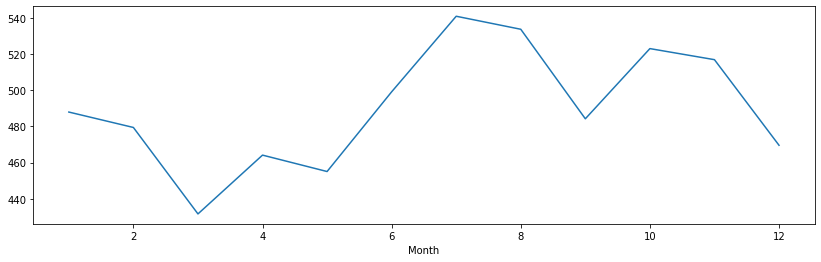

In [17]:
# Trend of average laptop sales by months
laptops.groupby(mon)['Retail Price'].mean().plot(figsize= (14,4), xlabel = "Month")

In [10]:
# Trend of monthly laptop sales for each configuration separately
pd.crosstab(index= laptops["Configuration"], columns = mon, values= laptops["Retail Price"], aggfunc="mean").fillna('-').round(2)

Date,1,2,3,4,5,6,7,8,9,10,11,12
Configuration,,,,,,,,,,,,
1,370.0,365.0,318.0,355.0,350.0,317.40,340.0,335.0,297.00,325.0,320.0,286.65
2,320.0,315.0,287.857143,305.0,300.0,263.76,290.0,285.0,257.09,275.0,270.0,249.10
3,410.0,405.0,383.636364,395.0,390.0,361.90,380.0,375.0,336.22,365.0,360.0,334.39
4,360.0,355.0,309.166667,345.0,340.0,316.16,330.0,325.0,301.54,315.0,310.0,278.51
5,430.0,425.0,379.68,415.0,410.0,348.92,400.0,395.0,347.45,385.0,380.0,345.97
...,...,...,...,...,...,...,...,...,...,...,...,...
860,-,-,-,-,-,706.70,740.0,740.0,673.40,740.0,740.0,669.89
861,-,-,-,-,-,749.25,810.0,810.0,767.12,810.0,810.0,718.88
862,-,-,-,-,-,665.00,760.0,760.0,681.62,760.0,760.0,720.91


<AxesSubplot:xlabel='Day'>

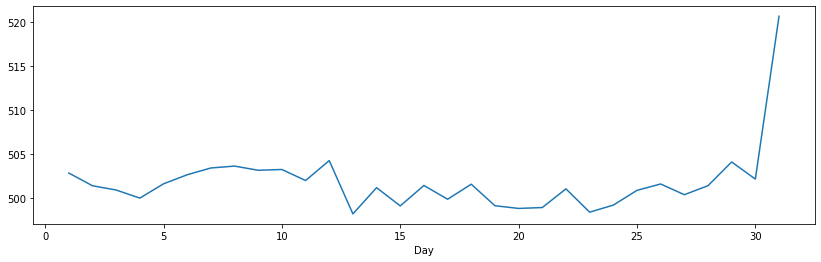

In [19]:
# Average sales of laptops by each day in a month
laptops.groupby(day)['Retail Price'].mean().plot(figsize= (14,4), xlabel = "Day")

In [20]:
# Same trend for each configuration separately
pd.crosstab(index= laptops["Configuration"], columns = day, values= laptops["Retail Price"], aggfunc="mean").round(2)

Date,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
Configuration,,,,,,,,,,,,,,,,,,,,,
1,338.54,333.79,338.38,349.00,347.50,335.00,320.67,338.47,324.38,343.12,...,340.00,366.67,339.38,344.00,312.56,349.17,334.17,334.00,324.79,340.91
2,269.12,289.44,283.56,285.96,271.95,266.75,276.00,279.33,287.18,293.75,...,274.33,287.50,281.43,285.42,282.60,298.89,294.44,296.82,285.88,268.50
3,362.09,377.45,372.50,388.00,367.14,387.86,367.90,374.91,381.50,372.14,...,375.45,382.50,364.50,383.57,346.94,359.07,379.44,385.00,383.12,388.00
4,320.95,320.25,308.92,309.00,305.58,341.92,341.25,317.50,341.25,324.50,...,325.35,336.11,315.94,290.22,311.37,321.21,319.00,325.00,327.50,325.00
5,401.43,402.78,383.33,377.62,400.94,386.86,374.58,394.33,388.08,396.00,...,385.50,391.67,402.50,319.75,372.25,400.00,380.12,381.14,380.31,408.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
860,676.57,695.60,740.00,703.00,673.40,740.00,740.00,666.00,666.00,666.00,...,695.60,740.00,740.00,708.29,740.00,740.00,629.00,740.00,740.00,740.00
861,775.29,810.00,688.50,783.00,761.40,810.00,810.00,810.00,810.00,810.00,...,810.00,761.40,743.73,810.00,740.57,810.00,810.00,718.88,779.62,810.00
862,731.50,760.00,714.40,760.00,646.00,646.00,714.40,703.00,760.00,714.40,...,694.86,714.40,684.00,734.67,718.55,760.00,703.00,722.00,718.55,760.00


In [22]:
# Stores performing below average
low_perf_str = laptops.groupby("Store Postcode")['Retail Price'].mean()[laptops.groupby("Store Postcode")['Retail Price'].mean().values < laptops['Retail Price'].mean()]
low_perf_str

Store Postcode
CR7 8LE     454.380606
E7 8NW      449.228315
N3 1DH      452.778351
SW1P 3AU    452.549539
W4 3PH      452.169728
Name: Retail Price, dtype: float64

In [23]:
# Sales metrics of low performing stores
laptops[laptops["Store Postcode"].isin(low_perf_str.index)]['Retail Price'].agg([min, 'mean', max, sum, 'std', 'var']).astype(int)

min          168
mean         452
max          890
sum     37589610
std          114
var        13117
Name: Retail Price, dtype: int32

In [24]:
# Grouping of laptops by Screen Size (Inches)
laptops['g1'] = np.where(laptops['Screen Size (Inches)'] < 16, "L_Size", "H_Size")

In [25]:
# Grouping of laptops by Battery Life (Hours)
laptops['g2'] = np.where( laptops['Battery Life (Hours)']<5, 'LBAT', 'HBAT')

In [26]:
# Grouping of laptops by RAM (GB)
laptops['g3'] = np.where( laptops['RAM (GB)']< 2.5,'L-RAM', 'H-RAM')

In [27]:
# Grouping of laptops by Processor Speeds (GHz)
laptops['g4'] = np.where( laptops['Processor Speeds (GHz)']<1.95, 'L.Speed', 'H.Speed')

In [28]:
# Grouping of laptops by HD Size (GB)
laptops['g5'] = np.where( laptops['HD Size (GB)'] < 170,'L_HD', 'H_HD')

In [61]:
# Grouping laptops into 32 groups based on above mentioned 5 specifications (2^5 = 32)
conf_grp = np.where((laptops.g1 == 'L_Size') & (laptops.g2 =="HBAT") & (laptops.g3 == "L-RAM") & (laptops.g4 == "H.Speed") & (laptops.g5 == "L_HD"), "G1",\
                    np.where((laptops.g1 == 'L_Size') & (laptops.g2 =="HBAT") & (laptops.g3 == "L-RAM") & (laptops.g4 == "H.Speed") & (laptops.g5 == "H_HD"), "G2",\
                            np.where((laptops.g1 == 'L_Size') & (laptops.g2 =="HBAT") & (laptops.g3 == "L-RAM") & (laptops.g4 == "L.Speed") & (laptops.g5 == "L_HD"), "G3",\
                                    np.where((laptops.g1 == 'L_Size') & (laptops.g2 =="HBAT") & (laptops.g3 == "L-RAM") & (laptops.g4 == "L.Speed") & (laptops.g5 == "H_HD"), "G4",\
                                            np.where((laptops.g1 == 'L_Size') & (laptops.g2 =="HBAT") & (laptops.g3 == "H-RAM") & (laptops.g4 == "H.Speed") & (laptops.g5 == "L_HD"), "G5",\
                                                np.where((laptops.g1 == 'L_Size') & (laptops.g2 =="HBAT") & (laptops.g3 == "H-RAM") & (laptops.g4 == "H.Speed") & (laptops.g5 == "H_HD"), "G6",\
                                                        np.where((laptops.g1 == 'L_Size') & (laptops.g2 =="HBAT") & (laptops.g3 == "H-RAM") & (laptops.g4 == "L.Speed") & (laptops.g5 == "L_HD"), "G7",\
                                                                np.where((laptops.g1 == 'L_Size') & (laptops.g2 =="HBAT") & (laptops.g3 == "H-RAM") & (laptops.g4 == "L.Speed") & (laptops.g5 == "H_HD"), "G8",\
                                                                        np.where((laptops.g1 == 'L_Size') & (laptops.g2 =="LBAT") & (laptops.g3 == "L-RAM") & (laptops.g4 == "H.Speed") & (laptops.g5 == "L_HD"), "G9",\
                                                                                np.where((laptops.g1 == 'L_Size') & (laptops.g2 =="LBAT") & (laptops.g3 == "L-RAM") & (laptops.g4 == "H.Speed") & (laptops.g5 == "H_HD"), "G10",\
                                                                                        np.where((laptops.g1 == 'L_Size') & (laptops.g2 =="LBAT") & (laptops.g3 == "L-RAM") & (laptops.g4 == "L.Speed") & (laptops.g5 == "L_HD"), "G11",\
                                                                                                np.where((laptops.g1 == 'L_Size') & (laptops.g2 =="LBAT") & (laptops.g3 == "L-RAM") & (laptops.g4 == "L.Speed") & (laptops.g5 == "H_HD"), "G12",\
                                                                                                        np.where((laptops.g1 == 'L_Size') & (laptops.g2 =="LBAT") & (laptops.g3 == "H-RAM") & (laptops.g4 == "H.Speed") & (laptops.g5 == "L_HD"), "G13",\
                                                                                                                np.where((laptops.g1 == 'L_Size') & (laptops.g2 =="LBAT") & (laptops.g3 == "H-RAM") & (laptops.g4 == "H.Speed") & (laptops.g5 == "H_HD"), "G14",\
                                                                                                                        np.where((laptops.g1 == 'L_Size') & (laptops.g2 =="LBAT") & (laptops.g3 == "H-RAM") & (laptops.g4 == "L.Speed") & (laptops.g5 == "L_HD"), "G15",\
                                                                                                                                np.where((laptops.g1 == 'L_Size') & (laptops.g2 =="LBAT") & (laptops.g3 == "H-RAM") & (laptops.g4 == "L.Speed")& (laptops.g5 == "H_HD"), "G16",\
                                                                                                                                        np.where((laptops.g1 == 'H_Size') & (laptops.g2 =="HBAT") & (laptops.g3 == "L-RAM") & (laptops.g4 == "H.Speed") & (laptops.g5 == "L_HD"), "G17",\
                                                                                                                                                np.where((laptops.g1 == 'H_Size') & (laptops.g2 =="HBAT") & (laptops.g3 == "L-RAM") & (laptops.g4 == "H.Speed") & (laptops.g5 == "H_HD"), "G18",\
                                                                                                                                                    np.where((laptops.g1 == 'H_Size') & (laptops.g2 =="HBAT") & (laptops.g3 == "L-RAM") & (laptops.g4 == "L.Speed") & (laptops.g5 == "L_HD"), "G19",\
                                                                                                                                                    np.where((laptops.g1 == 'H_Size') & (laptops.g2 =="HBAT") & (laptops.g3 == "L-RAM") & (laptops.g4 == "L.Speed") & (laptops.g5 == "H_HD"), "G20",\
                                                                                                                                                    np.where((laptops.g1 == 'H_Size') & (laptops.g2 =="HBAT") & (laptops.g3 == "H-RAM") & (laptops.g4 == "H.Speed") & (laptops.g5 == "L_HD"), "G21",\
                                                                                                                                                    np.where((laptops.g1 == 'H_Size') & (laptops.g2 =="HBAT") & (laptops.g3 == "H-RAM") & (laptops.g4 == "H.Speed") & (laptops.g5 == "H_HD"), "G22",\
                                                                                                                                                    np.where((laptops.g1 == 'H_Size') & (laptops.g2 =="HBAT") & (laptops.g3 == "H-RAM") & (laptops.g4 == "L.Speed") & (laptops.g5 == "L_HD"), "G23",\
                                                                                                                                                    np.where((laptops.g1 == 'H_Size') & (laptops.g2 =="HBAT") & (laptops.g3 == "H-RAM") & (laptops.g4 == "L.Speed") & (laptops.g5 == "H_HD"), "G24",\
                                                                                                                                                    np.where((laptops.g1 == 'H_Size') & (laptops.g2 =="LBAT") & (laptops.g3 == "L-RAM") & (laptops.g4 == "H.Speed") & (laptops.g5 == "L_HD"), "G25",\
                                                                                                                                                    np.where((laptops.g1 == 'H_Size') & (laptops.g2 =="LBAT") & (laptops.g3 == "L-RAM") & (laptops.g4 == "H.Speed") & (laptops.g5 == "H_HD"), "G26",\
                                                                                                                                                    np.where((laptops.g1 == 'H_Size') & (laptops.g2 =="LBAT") & (laptops.g3 == "L-RAM") & (laptops.g4 == "L.Speed") & (laptops.g5 == "L_HD"), "G27",\
                                                                                                                                                    np.where((laptops.g1 == 'H_Size') & (laptops.g2 =="LBAT") & (laptops.g3 == "L-RAM") & (laptops.g4 == "L.Speed") & (laptops.g5 == "H_HD"), "G28",\
                                                                                                                                                    np.where((laptops.g1 == 'H_Size') & (laptops.g2 =="LBAT") & (laptops.g3 == "H-RAM") & (laptops.g4 == "H.Speed") & (laptops.g5 == "L_HD"), "G29",\
                                                                                                                                                    np.where((laptops.g1 == 'H_Size') & (laptops.g2 =="LBAT") & (laptops.g3 == "H-RAM") & (laptops.g4 == "H.Speed") & (laptops.g5 == "H_HD"), "G30",\
                                                                                                                                                    np.where((laptops.g1 == 'H_Size') & (laptops.g2 =="LBAT") & (laptops.g3 == "H-RAM") & (laptops.g4 == "L.Speed") & (laptops.g5 == "L_HD"), "G31", "G32")))))))))))))))))))))))))))))))

In [68]:
laptops['New Col'] = conf_grp

In [96]:
# Average sales of laptops by each of these 32 groups
laptops.groupby("New Col")['Retail Price'].mean().round(2).sort_values()

New Col
G11    351.39
G9     396.80
G3     415.72
G12    431.53
G1     446.64
G27    453.54
G10    462.59
G4     478.17
G25    483.95
G15    492.25
G19    500.85
G2     509.64
G13    527.63
G17    529.83
G28    531.52
G7     541.31
G26    564.78
G5     574.59
G20    577.49
G16    583.68
G31    588.14
G14    611.34
G18    614.72
G29    620.47
G8     626.68
G23    638.43
G6     663.33
G32    677.80
G21    679.17
G30    710.82
G24    734.22
G22    769.16
Name: Retail Price, dtype: float64

In [12]:
# Creating a variable distance between the customer and the store
laptops['Distance'] = np.sqrt((laptops['C OSx'] - laptops['St OS X'])**2 + (laptops['C OSy'] - laptops['St OS Y'])**2)

In [13]:
laptops.Distance.agg([min, "mean", 'median', max, sum]).astype(int)

min                0
mean            3681
median          3369
max            19892
sum       1094059175
Name: Distance, dtype: int32

In [108]:
# Average distance travelled by customers to a particular store
laptops.groupby("Store Postcode").Distance.mean().round(2)

Store Postcode
CR7 8LE     3031.15
E2 0RY      3799.09
E7 8NW      2919.48
KT2 5AU     3616.11
N17 6QA     5318.00
N3 1DH      5376.96
NW5 2QH     3528.81
SE1 2BN     3152.30
SE8 3JD     5198.09
SW12 9HD    5299.01
SW18 1NN    6649.29
SW1P 3AU    2727.77
SW1V 4QQ    3118.49
W10 6HQ     4208.23
W4 3PH      5217.47
Name: Distance, dtype: float64

In [114]:
# Average distance travelled by customers to a particular store on each date 
laptops.pivot_table(index = "Store Postcode", columns = "Date", values = "Distance", aggfunc = "mean", margins = True).round(2)

Date,2015-01-01 00:00:00,2015-01-02 00:00:00,2015-01-03 00:00:00,2015-01-04 00:00:00,2015-01-05 00:00:00,2015-01-06 00:00:00,2015-01-07 00:00:00,2015-01-08 00:00:00,2015-01-09 00:00:00,2015-01-10 00:00:00,...,2015-12-22 00:00:00,2015-12-23 00:00:00,2015-12-24 00:00:00,2015-12-25 00:00:00,2015-12-26 00:00:00,2015-12-27 00:00:00,2015-12-28 00:00:00,2015-12-29 00:00:00,2015-12-30 00:00:00,All
Store Postcode,,,,,,,,,,,,,,,,,,,,,
CR7 8LE,4200.42,3125.51,3327.66,1751.46,2854.52,3232.52,4405.44,2588.61,2780.69,3061.12,...,2760.32,3280.50,3284.55,3035.26,3211.69,2675.44,2948.53,3196.62,2591.71,3031.15
E2 0RY,3654.70,3107.11,3951.43,3680.36,3735.77,3440.76,3572.71,3669.86,3489.36,3738.26,...,3958.65,3797.00,3890.53,3776.61,3863.15,3600.42,3881.06,3724.83,3838.48,3799.09
E7 8NW,2275.47,2470.32,3007.62,1704.18,3449.04,4037.38,2462.60,2486.62,2269.91,3672.66,...,2851.63,3220.66,3348.65,2930.38,2253.18,2871.58,2735.23,2644.48,3681.25,2919.48
KT2 5AU,5829.46,2679.06,NaN,3458.13,4318.47,2232.56,5143.75,3447.17,2696.39,NaN,...,2931.05,3759.21,3490.21,3418.64,3547.96,4409.16,3694.58,3029.22,3314.97,3616.11
N17 6QA,2096.97,4587.75,3721.07,4615.97,5349.84,4881.78,5378.99,5768.78,3627.77,6229.72,...,5600.55,5054.77,5366.60,5202.03,4999.28,5320.43,4967.23,5124.04,5345.86,5318.00
N3 1DH,6181.82,6696.68,5792.08,5130.12,4570.16,3707.88,6351.95,6502.13,1793.14,3790.02,...,5753.90,5503.73,5668.42,5401.62,5527.57,5289.68,5140.37,4767.11,6022.55,5376.96
NW5 2QH,3185.35,3557.81,3504.45,3033.32,4134.95,3313.08,3479.89,3676.44,3561.92,3564.32,...,3532.81,3515.83,3509.73,3377.44,3484.66,3495.56,3411.50,3603.68,3483.38,3528.81
SE1 2BN,3509.77,3039.28,3103.24,2860.17,2912.60,2989.52,3095.67,3292.71,3063.15,2965.59,...,3144.48,3222.20,3154.38,3138.45,3156.28,3290.39,3200.08,3241.95,3233.69,3152.30
SE8 3JD,5126.29,5522.29,3902.86,5314.93,6457.62,5635.51,5918.30,4070.77,4554.46,5669.18,...,5681.18,4923.86,5215.14,4919.57,5502.02,4963.05,5098.36,5253.42,4760.57,5198.09


In [20]:
# Distance (average) and Sales(average and total) contribution of a particular store 
laptops.groupby("Store Postcode")[['Distance', 'Retail Price']].agg({'Distance':'mean', 'Retail Price': ['mean', sum]}).round().sort_values(by = ("Retail Price", 'sum'))

Distance Retail Price            
                   mean         mean         sum
Store Postcode                                  
N3 1DH           5377.0        453.0   1361504.0
E7 8NW           2919.0        449.0   1703923.0
KT2 5AU          3616.0        522.0   2260425.0
N17 6QA          5318.0        523.0   2475360.0
W4 3PH           5217.0        452.0   2954477.0
CR7 8LE          3031.0        454.0   3556437.0
W10 6HQ          4208.0        520.0   6092285.0
SW12 9HD         5299.0        521.0   6606150.0
SW18 1NN         6649.0        520.0   7317510.0
SE8 3JD          5198.0        521.0   8627840.0
E2 0RY           3799.0        520.0  15957910.0
NW5 2QH          3529.0        521.0  16348205.0
SW1V 4QQ         3118.0        520.0  22599730.0
SE1 2BN          3152.0        520.0  23190485.0
SW1P 3AU         2728.0        453.0  28013269.0